In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = df.drop(columns=['id'])
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,572.000000,572.000000,571.000000,571.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,14.093897,19.317185,91.814746,653.229247,0.096131,0.104023,0.088334,0.048663,0.181044,0.062777,...,16.233456,25.701836,107.008934,877.373427,0.132146,0.253269,0.270761,0.114005,0.290060,0.083875
std,3.544794,4.306482,24.395759,352.412008,0.014379,0.052856,0.079769,0.038862,0.027390,0.007048,...,4.845627,6.139471,33.694078,569.580224,0.022978,0.157522,0.209004,0.066081,0.061705,0.018040
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.677500,16.177500,75.015000,419.250000,0.085992,0.063755,0.029097,0.020245,0.161875,0.057775,...,12.980000,21.095000,83.967500,513.700000,0.116200,0.145325,0.112300,0.063975,0.250475,0.071260
50%,13.320000,18.880000,86.180000,546.400000,0.095825,0.092350,0.060705,0.033375,0.179150,0.061485,...,14.940000,25.445000,97.620000,684.550000,0.131250,0.211750,0.226200,0.099425,0.282450,0.079960
75%,15.780000,21.825000,103.950000,782.650000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.767500,29.902500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
display(f"null values: {df.isnull().sum().sum()}")
display(f"before null values removal, df len = {len(df)}")

df = df.dropna()

display(f"after null values removal, df len = {len(df)}")

'null values: 3'

'before null values removal, df len = 572'

'after null values removal, df len = 569'

In [5]:
def remove_outliers(df: pd.DataFrame):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    
    outliers = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    
    print(f"outliers: {len(outliers)}")
    
remove_outliers(df.drop(columns=['diagnosis']))

outliers: 171


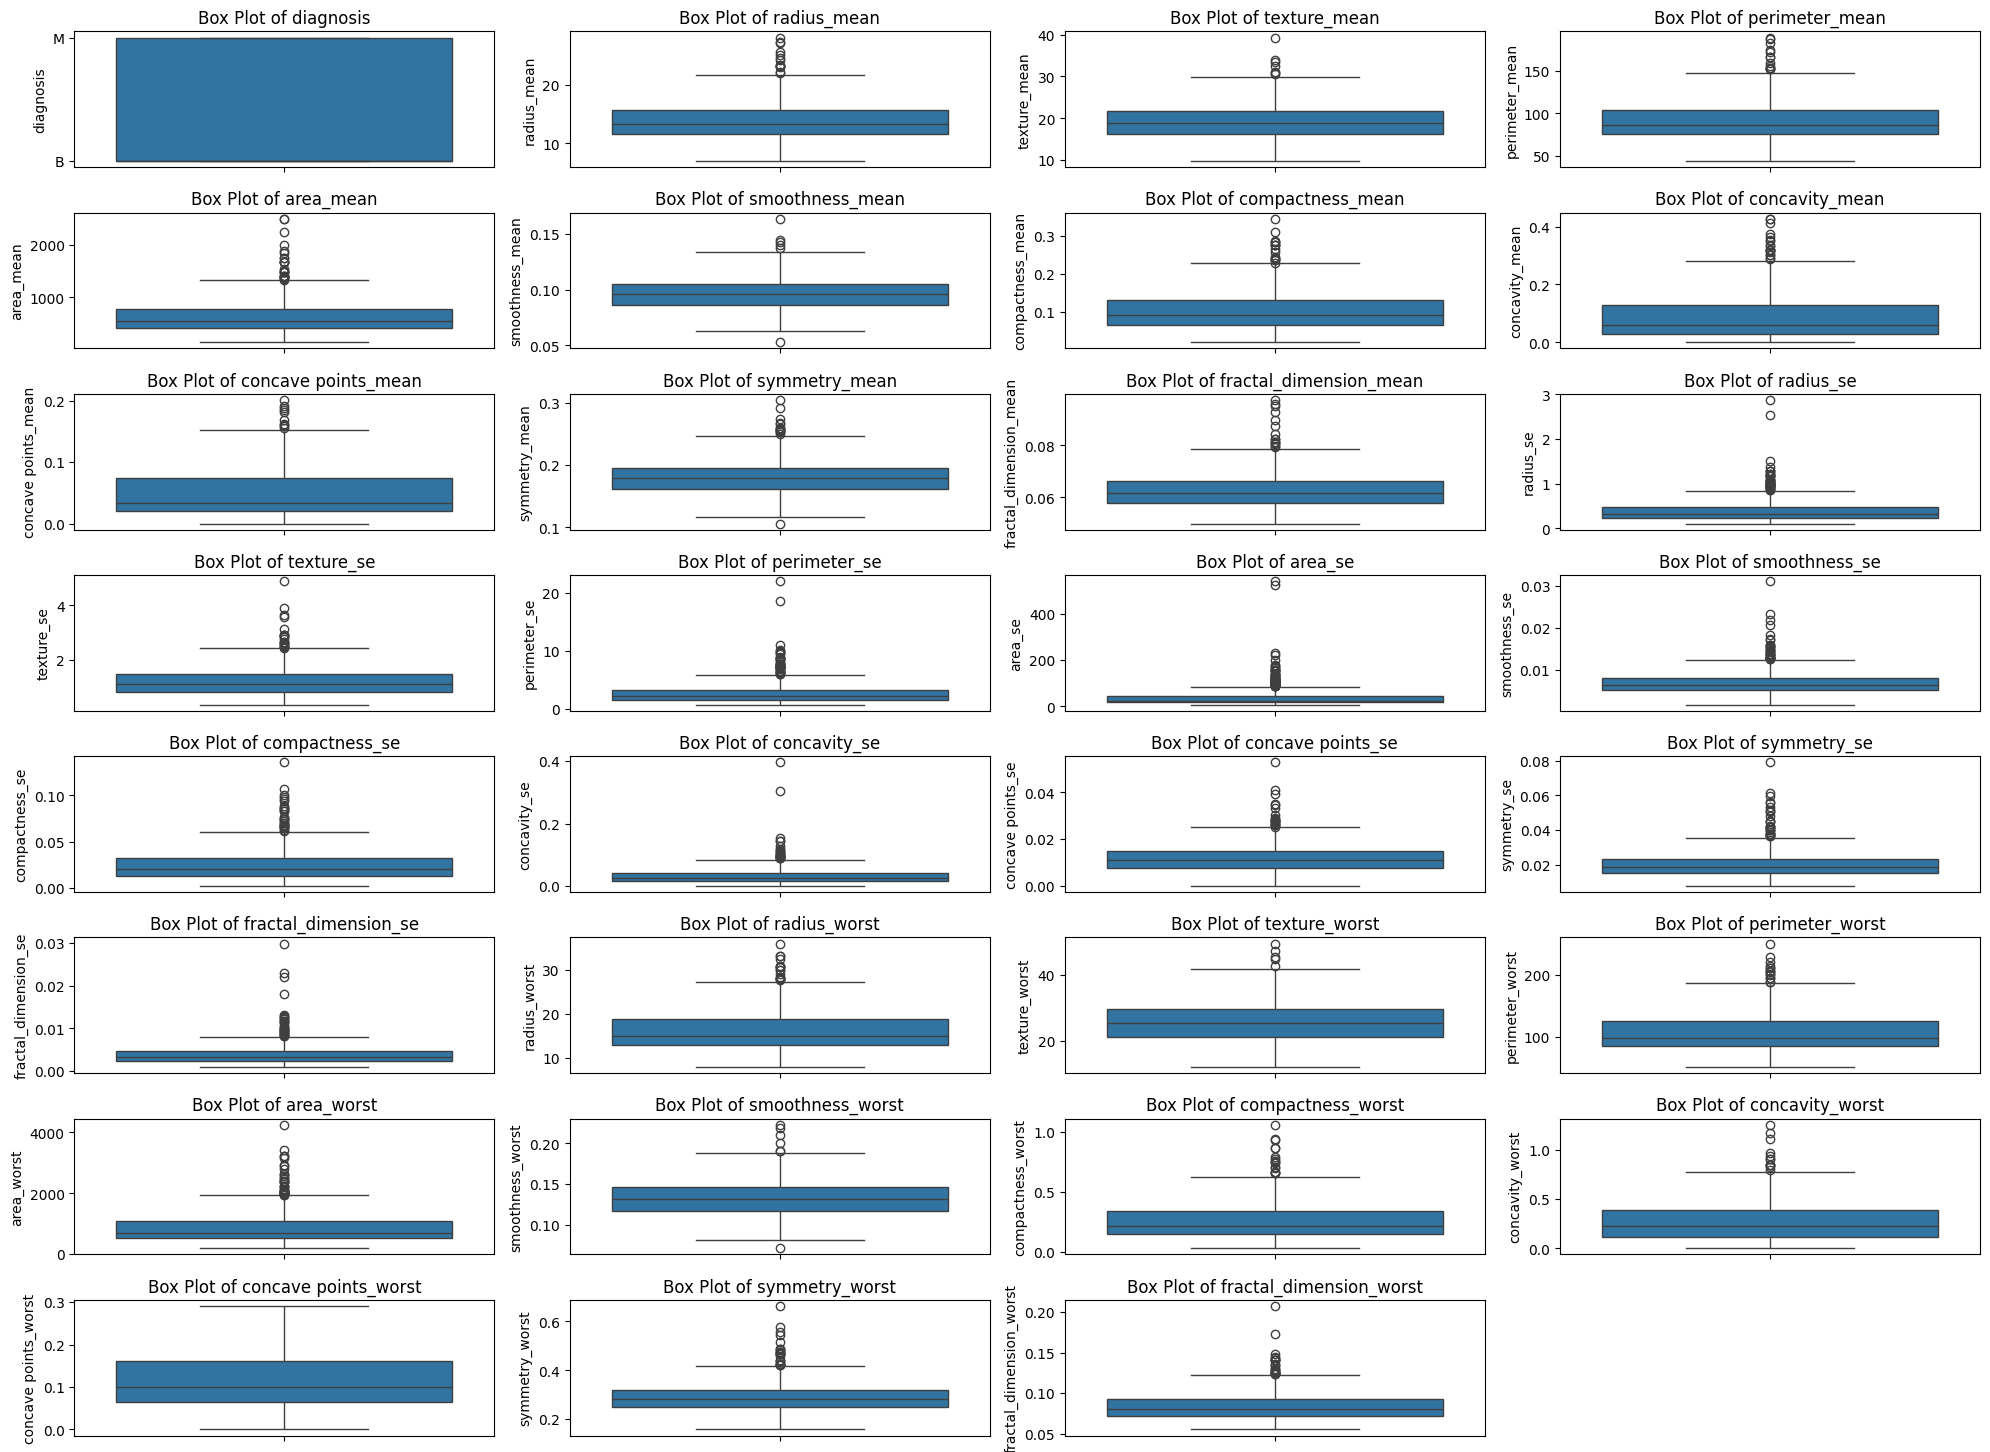

In [6]:
import math
num_cols = len(df.columns)

# Define subplot grid size (rows × cols)
num_rows = math.ceil(num_cols / 3)  # Maximum 3 plots per row
num_cols_per_row = min(num_cols, 4)  # Max 3 columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 20))

# Flatten axes array if it is 2D (for easy indexing)
axes = axes.flatten()

# Loop through columns and create box plots
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

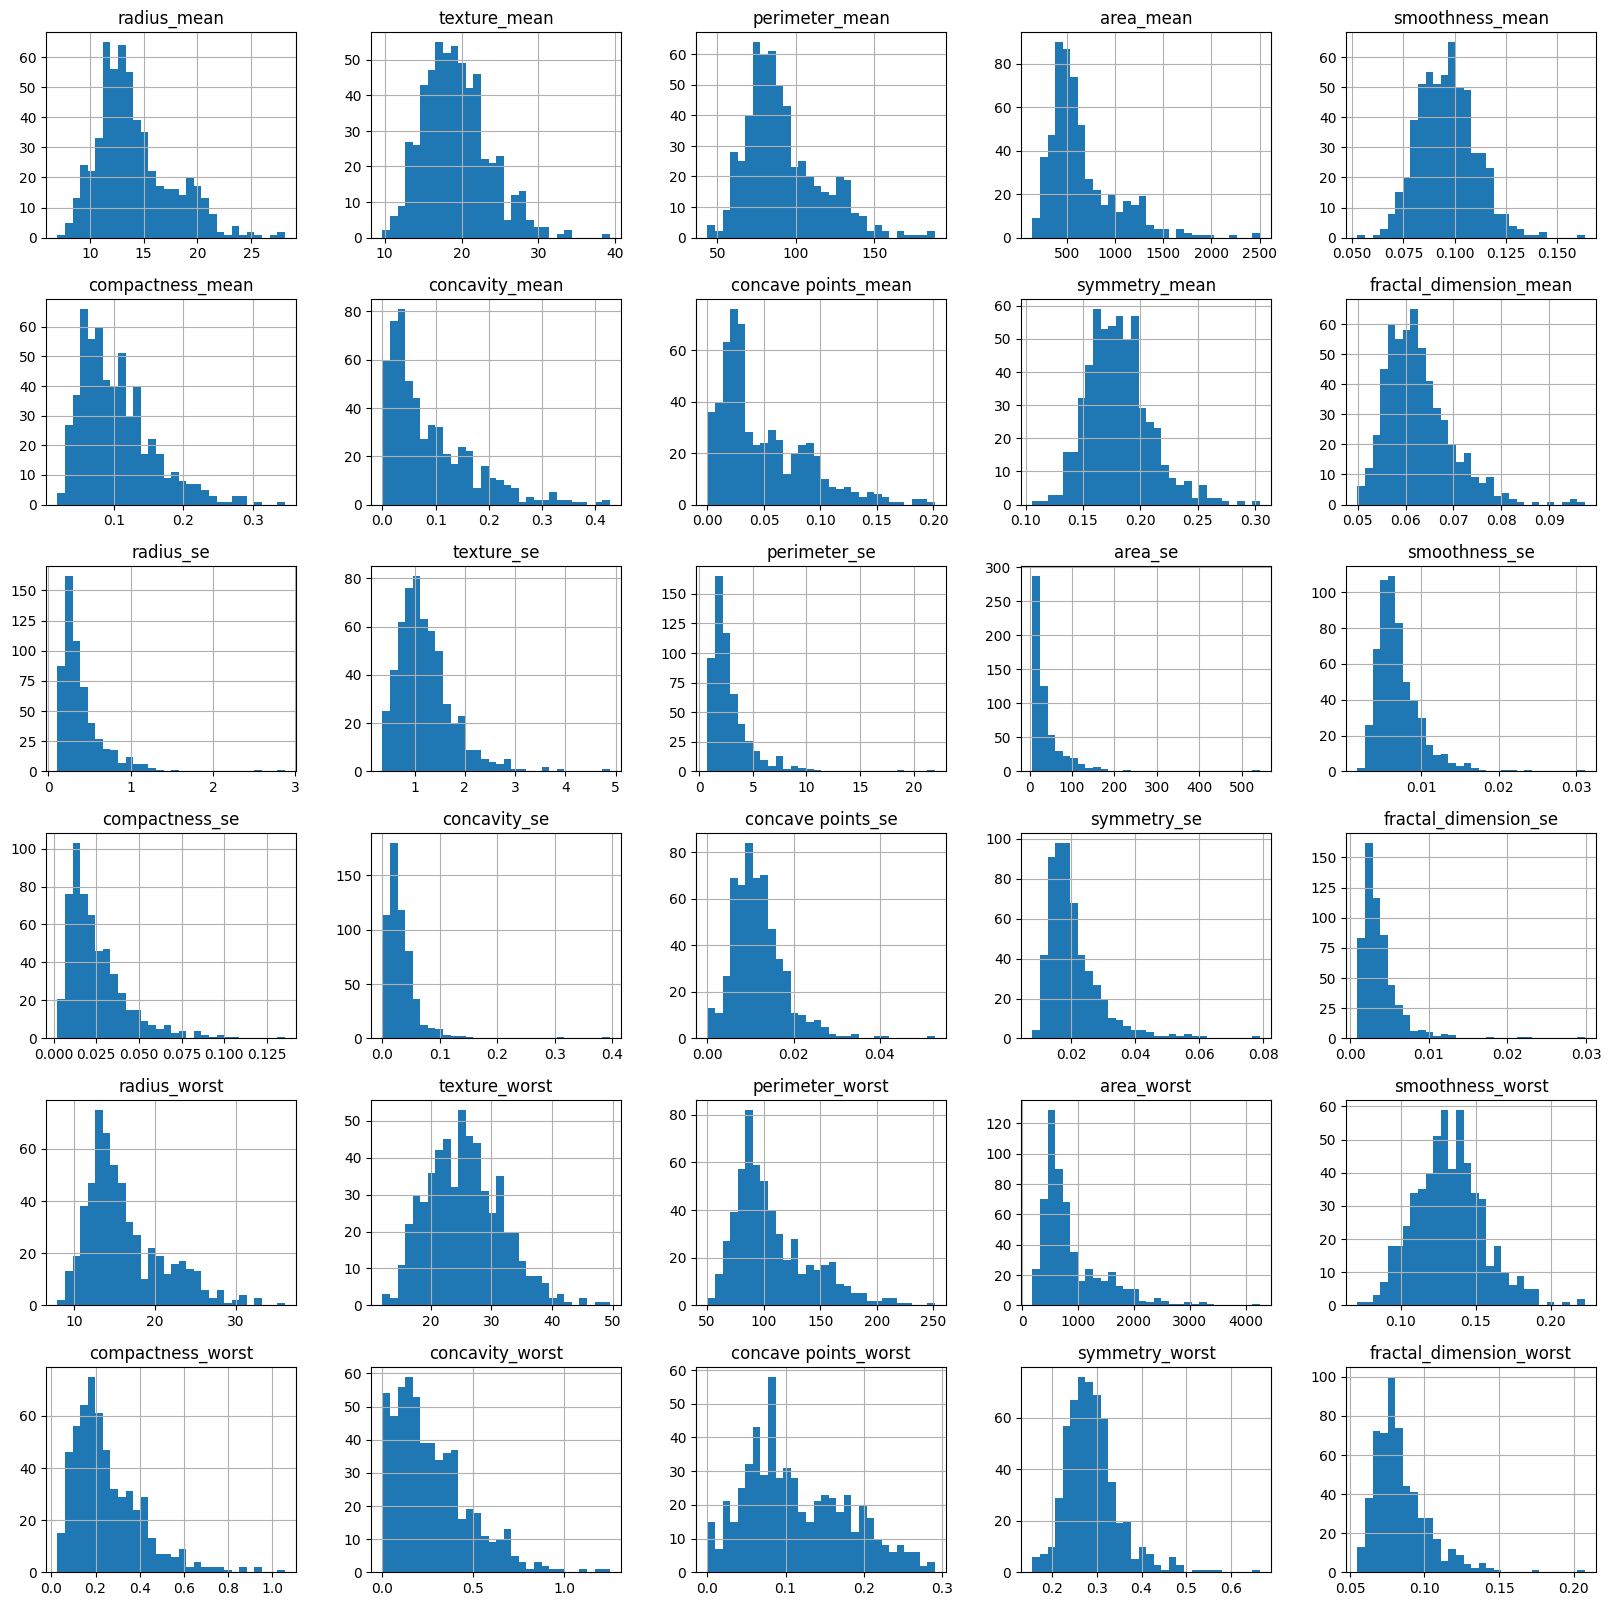

In [7]:
df.hist(figsize=(20, 20), bins=30)
plt.show()

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<Axes: xlabel='diagnosis', ylabel='count'>

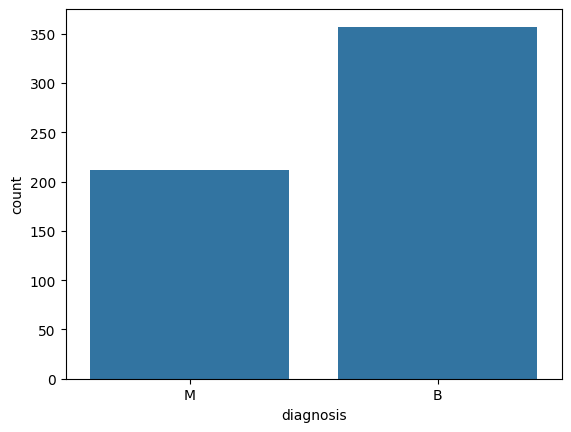

In [8]:
display(df['diagnosis'].value_counts(normalize=True))
sns.countplot(x=df['diagnosis'])


In [9]:
scaler = StandardScaler()

X = df.drop(columns=['diagnosis'])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
y = df['diagnosis']

In [10]:
y = y.map({ 'B': 0, 'M': 1})
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:


def PCA(X: pd.DataFrame, n):
    columns = X.columns
    X = X.to_numpy()
    X_np = X.copy()
    covariance = X_np.T @ X_np
    covariance


    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    columns = columns[sorted_idx]

    best_features = n
    selected = X_np @ (eigenvectors[:, :best_features])
    columns = columns[:best_features]


    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative = np.cumsum(explained_variance_ratio)
    
    reconstructed = selected @ eigenvectors[:, :best_features].T


    
    return selected, columns, cumulative, eigenvalues[:best_features], eigenvectors[:, :best_features]
    
selected, columns, cumulative, _, eigenvectors = PCA(X, 5)
selecteddf = pd.DataFrame(selected, columns=columns)
selecteddf



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,9.192837,1.948583,-1.123166,3.633731,1.195110
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775
2,5.733896,-1.075174,-0.551748,0.912083,0.177086
3,7.122953,10.275589,-3.232790,0.152547,2.960878
4,3.935302,-1.948072,1.389767,2.940639,-0.546747
...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824
565,3.793382,-3.584048,2.088476,-2.506028,0.510723
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991
567,10.374794,1.672010,-1.877029,-2.356031,0.033742


In [12]:

reconstructed = selected @ eigenvectors.T
reconstructed

print(f"reconstruction loss: {np.linalg.norm(X - reconstructed) ** 2 / np.linalg.norm(X) ** 2}")

reconstruction loss: 0.15265725683192763


In [13]:
print(f"Explained variance ratios of top 5 principal components: {cumulative}")

Explained variance ratios of top 5 principal components: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


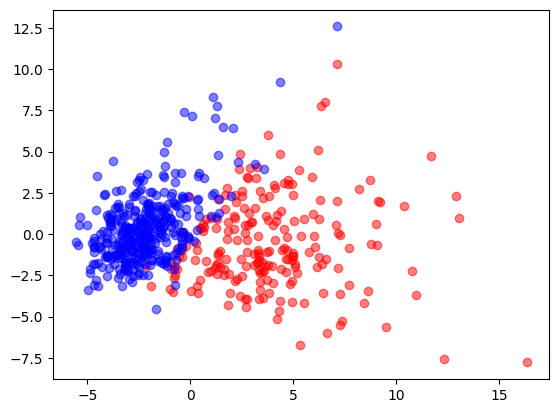

In [14]:
plt.scatter(selected[y == 1, 0], selected[y == 1, 1], color='red', alpha=0.5)
plt.scatter(selected[y == 0, 0], selected[y == 0, 1], color='blue', alpha=0.5)


plt.show()

In [15]:

required = np.argmax(cumulative >= 0.95) + 1
print(f"Maximum principal components required to explain 95% of variance: {required}")

Maximum principal components required to explain 95% of variance: 10


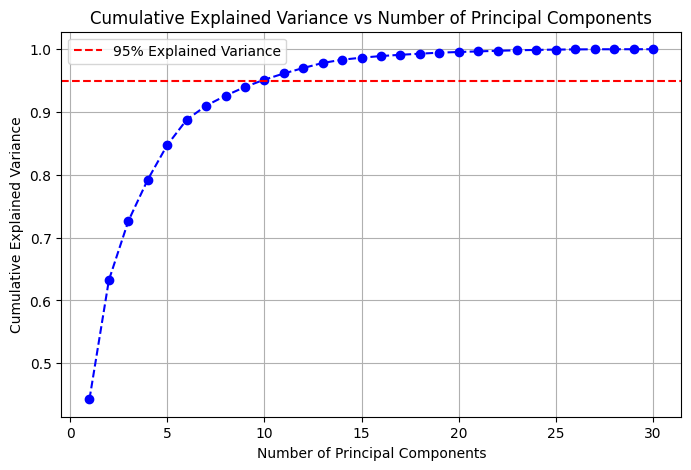

In [16]:

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def train(X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)
    
    lg = LogisticRegression()
    lg.fit(X_resampled, y_resampled)
    
    y_pred = lg.predict(xtest)
    
    score, accuracy = f1_score(ytest, y_pred)
    accuracy = accuracy(ytest, y_pred)
    
    return score

best_score, best_n = float('-inf'), X.shape[1]
for i in range(0, X.shape[1]):
    x_pca, _, _, _, _ = PCA(X, i + 1)
    score, accuracy = train(x_pca, y)
    
    print(f"{i + 1} components, score: {score}")
    if score > best_score:
        best_score = score
        best_n = i + 1
print(f"Best number of principal components: {best_n}, score: {best_score}")

TypeError: cannot unpack non-iterable numpy.float64 object

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

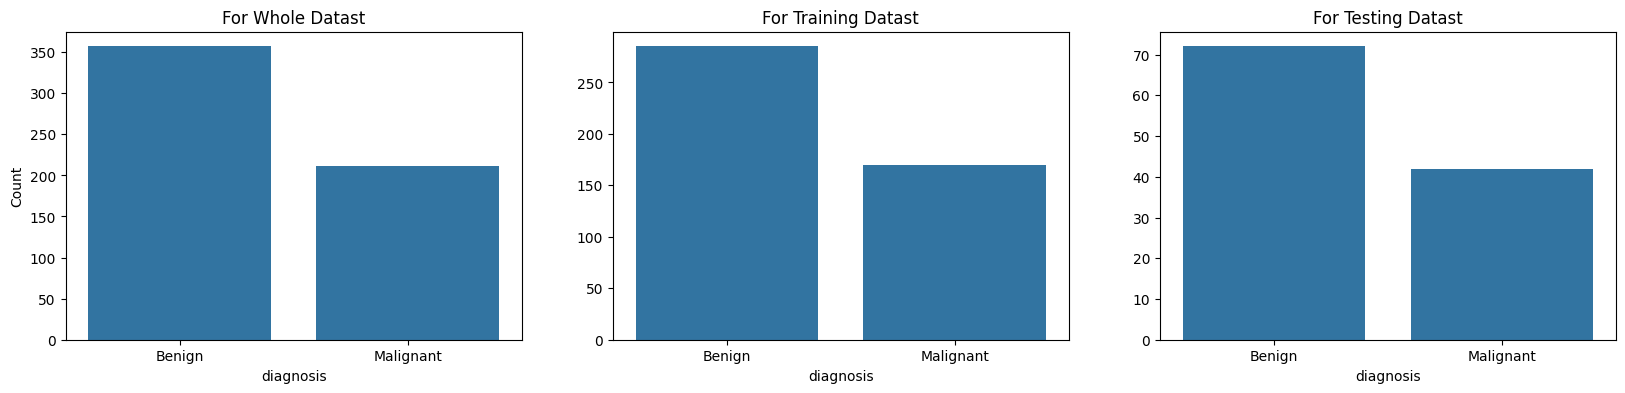

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])

# train
plt.sca(ax[1])
sns.countplot(x=ytrain)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])

# test
plt.sca(ax[2])
sns.countplot(x=ytest)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()


diagnosis
1    285
0    285
Name: count, dtype: int64


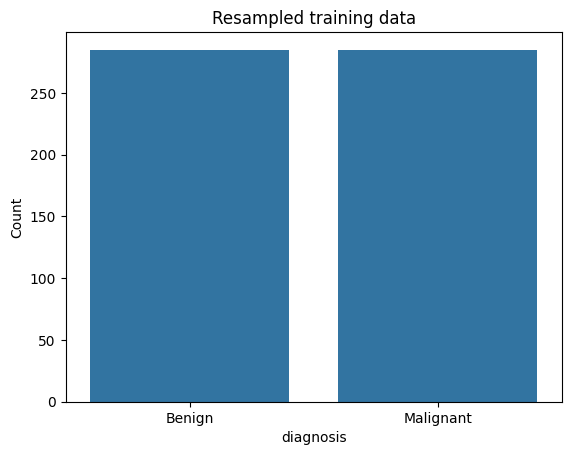

In [20]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

print(pd.Series(y_resampled).value_counts())

sns.countplot(x=y_resampled)
plt.title('Resampled training data')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.show()

In [26]:
X_resampled.to_csv("data/xtrain.csv")
y_resampled.to_csv("data/ytrain.csv")

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.cluster import KMeans

results = {}

def evaluate_model(xsample, ysample, label):
    xtrain, xtest, ytrain, ytest = train_test_split(xsample, ysample, test_size=0.3, random_state=42)
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
    pipe.fit(xtrain, ytrain)
    
    ypred = pipe.predict(xtest)
    results[label] = {
        "accuracy": accuracy_score(ytest, ypred),
        "f1 score": f1_score(ytest, ypred),
        "precision": precision_score(ytest, ypred),
        "recall": recall_score(ytest, ypred)
    }
    
    
strategies = []

xran, _, yran, _ = train_test_split(X, y, train_size=0.5, random_state=42)
strategies.append((xran, yran, "random sampling"))

xran, _, yran, _ = train_test_split(X, y, stratify=y, random_state=42, train_size=0.5)
strategies.append((xran, yran, "stratified sampling"))

step = 2
xran = X.iloc[::step]
yran = y.iloc[::step]
strategies.append((xran, yran, "systematic sampling"))

clusterdf = pd.DataFrame(X, columns=X.columns)
clusterdf = pd.concat((X, y), axis=1)
n_clusters = 5  # Let's say you want to make 5 clusters
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
clusterdf['Cluster'] = cluster_labels
chosen = np.random.choice(np.unique(cluster_labels), size=2, replace=False)

sampled_df = clusterdf[clusterdf['Cluster'].isin(chosen)]
sampled_x = sampled_df.drop(columns=['diagnosis', 'Cluster'])
sampled_y = sampled_df['diagnosis']
xran, _, yran, _ = train_test_split(sampled_x, sampled_y, random_state=42, train_size=0.5)
strategies.append((xran, yran, "clustered sampling"))

for x_, y_, label in strategies:
    evaluate_model(x_, y_, label)
    
results = pd.DataFrame(results).T
results 


,accuracy,f1 score,precision,recall
random sampling,0.965116,0.952381,0.937500,0.967742
stratified sampling,0.953488,0.923077,0.923077,0.923077
systematic sampling,0.976744,0.968750,0.968750,0.968750
clustered sampling,1.000000,1.000000,1.000000,1.000000


<Figure size 1000x600 with 0 Axes>

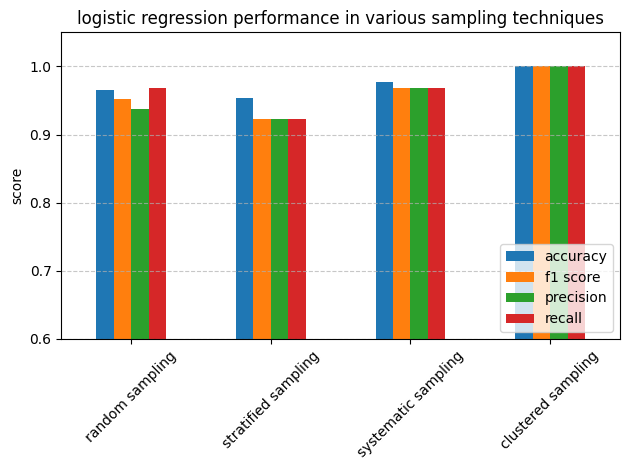

In [22]:
plt.figure(figsize=(10, 6))
results.plot(kind='bar', rot=0)
plt.title("logistic regression performance in various sampling techniques")
plt.ylabel('score')
plt.ylim(0.6, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [33]:
x_pca, _, _, _, _ = PCA(X, 2)

train(x_pca, y)

0.9761904761904762